In [38]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
import matplotlib.pyplot as plt

In [15]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [16]:
train_df.shape

(60000, 785)

In [4]:
train_df.describe

<bound method NDFrame.describe of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

     

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
train_df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [7]:
train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df['label'].values

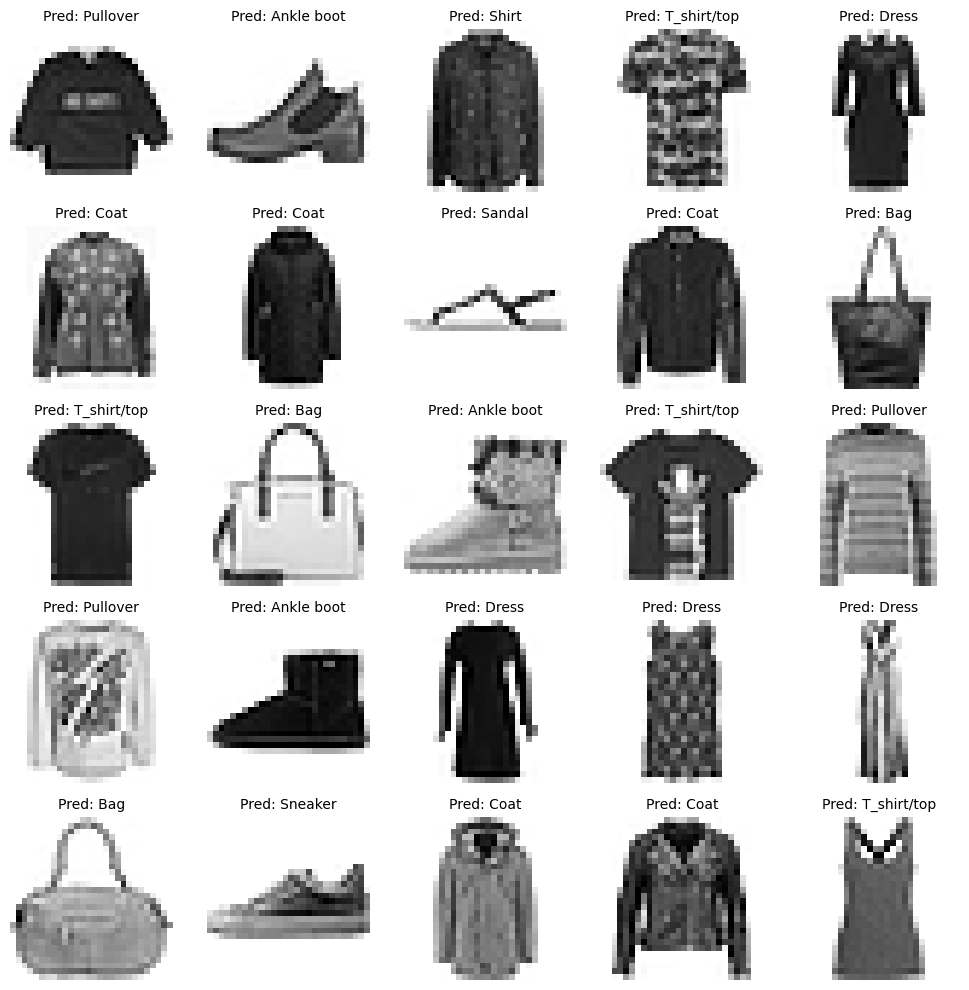

In [37]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_train[i]]}", fontsize=10)

plt.tight_layout()
plt.show()


In [46]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), #convert multidimensional data into a 1D vector
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7695 - loss: 0.6688 - val_accuracy: 0.8828 - val_loss: 0.3565
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8773 - loss: 0.3565 - val_accuracy: 0.8944 - val_loss: 0.3173
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8922 - loss: 0.3134 - val_accuracy: 0.8971 - val_loss: 0.2990
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8997 - loss: 0.2875 - val_accuracy: 0.8963 - val_loss: 0.2957
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9059 - loss: 0.2698 - val_accuracy: 0.9052 - val_loss: 0.2798


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [48]:
accuracy=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8967 - loss: 0.2861


In [49]:
y_probas = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [56]:
y_pred = y_probas.argmax(axis=-1)

In [57]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

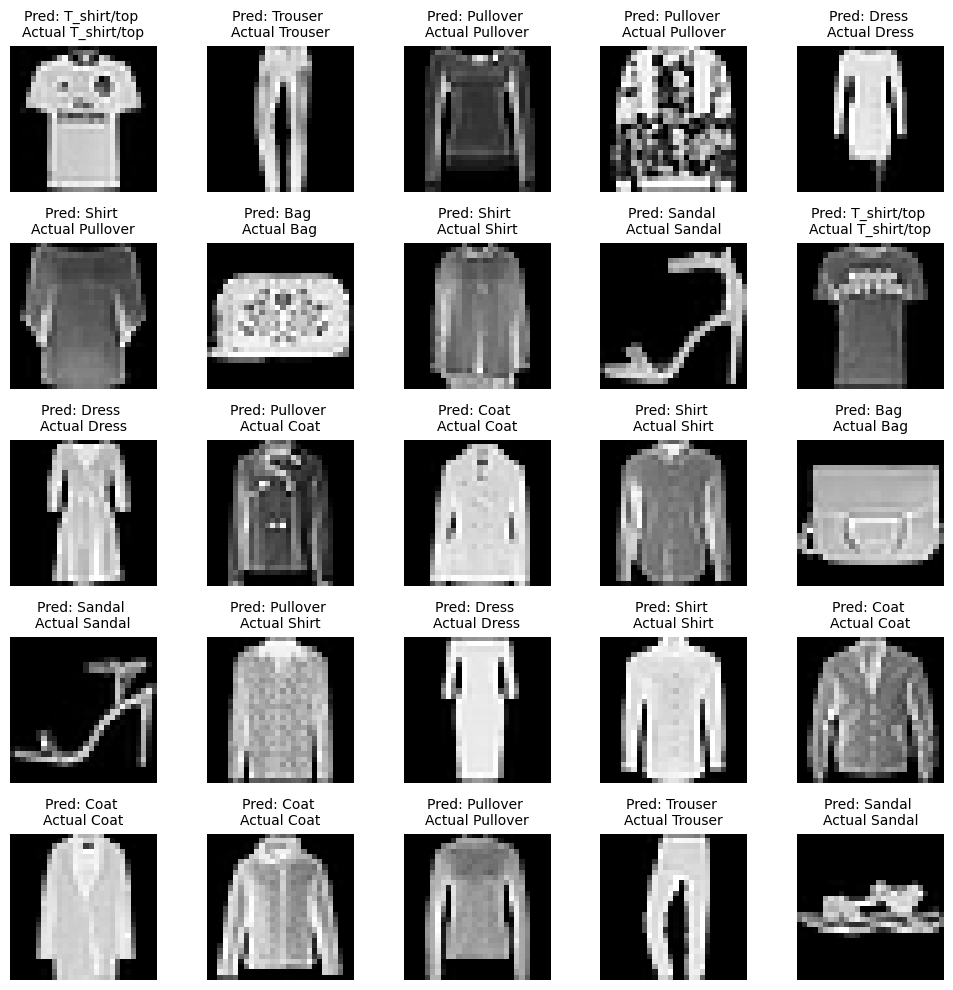

In [ ]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred[i]]} \nActual {class_names[y_test[i]]}", fontsize=10)

plt.tight_layout()
plt.show()


In [25]:
import pandas as pd

df = pd.read_csv('fashion-mnist_train.csv')
print(sorted(df['label'].unique()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


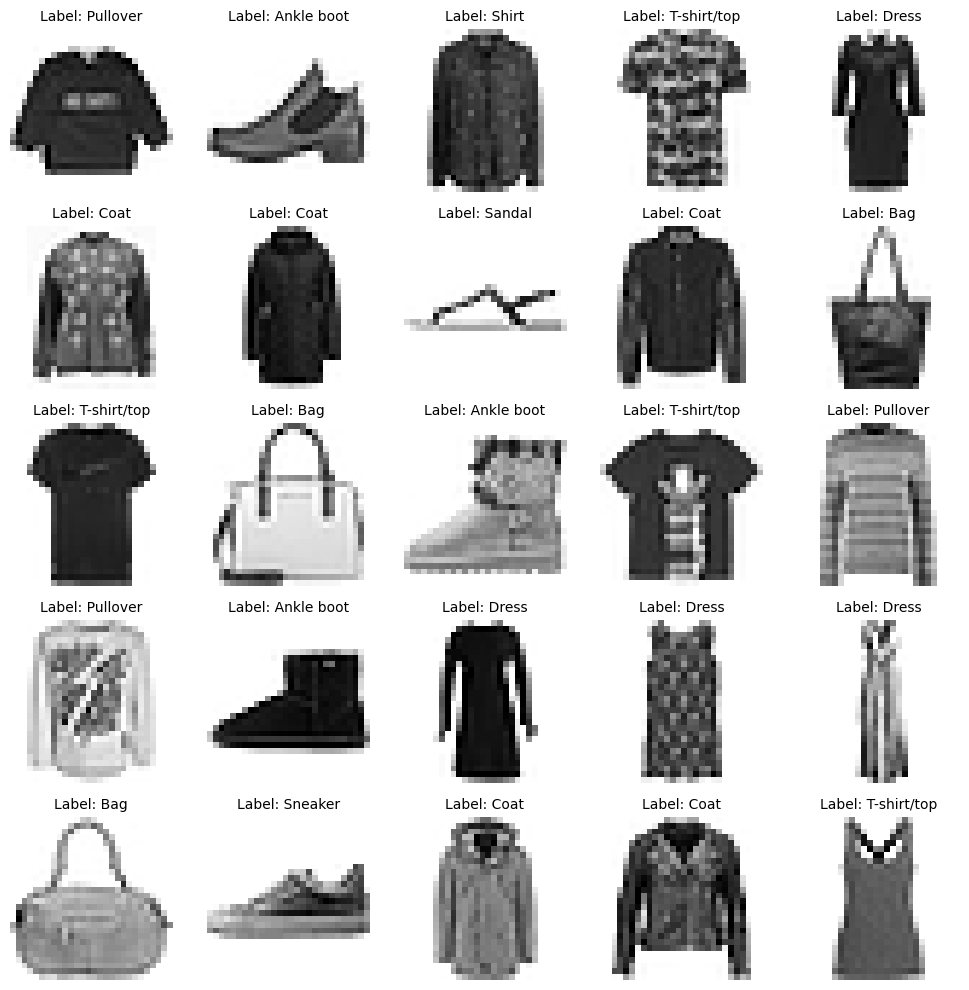

In [27]:
# Visual check on actual labels
label_to_name = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    label = y_train[i]
    plt.title(f"Label: {label_to_name[label]}", fontsize=10)
plt.tight_layout()
plt.show()


In [31]:
y_train

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [34]:
X_train = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df['label'].values

In [35]:
y_train

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)